In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm
import patsy

In [11]:
codecademy = pd.read_csv('codecademy.csv')
codecademy.head()

,score,completed,lesson
0,82.7,35.0,Lesson A
1,65.2,31.0,Lesson A
2,55.3,33.0,Lesson A
3,28.8,25.0,Lesson B
4,31.2,18.0,Lesson B


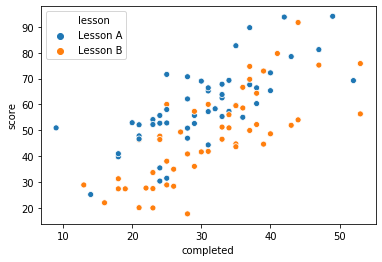

In [12]:
sns.scatterplot(x = 'completed', 
                y = 'score', 
                hue = 'lesson', 
                data = codecademy)
plt.show()

In [13]:
model1 = sm.OLS.from_formula('score ~ lesson + completed', data=codecademy).fit()
print(model1.params)

Intercept             18.343754
lesson[T.Lesson B]   -13.186033
completed              1.354415
dtype: float64


## Equation:

score = 18.3 - 13.2 \* lesson\[T.Lesson B\] + 1.35 \* completed

### for lesson A:

lesson\[T.Lesson B\] = 0, so: 

score = 18.3 - 13.2 \* lesson\[T.Lesson B\] + 1.35 \* completed \
score = 18.3 - 13.2 \* 0 + 1.35 \* completed \
score = 18.3 + 1.35 \* completed

### for lesson B:

lesson\[T.Lesson B\] = 1, so: 

score = 18.3 - 13.2 \* lesson\[T.Lesson B\] + 1.35 \* completed \
score = 18.3 - 13.2 \* 1 + 1.35 \* completed \
score = 5.1 + 1.35 \* completed



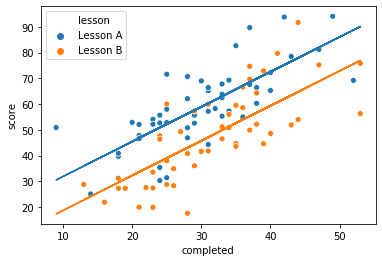

In [14]:
# to visualize this: 
sns.scatterplot(x = 'completed', 
                y = 'score', 
                hue = 'lesson', 
                data = codecademy)
b0 = model1.params[0]
b1 = model1.params[1]
b2 = model1.params[2]

lesson_A_preds = b0 + b2*codecademy.completed
lesson_B_preds = b0 + b1 + b2*codecademy.completed

plt.plot(codecademy.completed, lesson_A_preds)
plt.plot(codecademy.completed, lesson_B_preds)
plt.show()

In [23]:
student = pd.read_csv('student.csv')
student.head()

,address,age,math1,math2,math3,port1,port2,port3
0,R,15,3.5,5.0,5.0,6.5,6.5,6.5
1,R,15,4.0,3.0,2.5,6.5,5.5,5.5
2,R,15,7.0,6.5,6.5,7.0,6.5,6.0
3,R,15,5.0,4.5,4.0,5.0,5.5,5.0
4,R,15,5.0,5.0,5.0,6.5,6.5,6.5


In [24]:
model2 = sm.OLS.from_formula('port3 ~ math1 + port1', data=student).fit()

# Print resulting coefficients here:
print(model2.params)

Intercept    0.440159
math1        0.111161
port1        0.860927
dtype: float64


## Equation:

port3 = 0.44 - 0.11 \* math1 + 0.86 \* port1

### for port1 = 0:

port3 = 0.44 - 0.11 \* math1 + 0.86 \* port1 \
port3 = 0.44 - 0.11 \* math1 + 0.86 \* 0 \
port3 = 0.44 - 0.11 \* math1

### for port1 = 1:

port3 = 0.44 - 0.11 \* math1 + 0.86 \* port1 \
port3 = 0.44 - 0.11 \* math1 + 0.86 \* 1 \
port3 = (0.44 + 0.86) - 0.11 \* math1

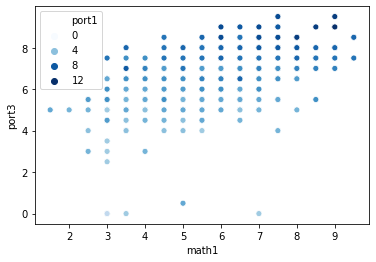

In [20]:
sns.scatterplot(x='math1', 
                y='port3', 
                hue='port1', 
                palette='Blues', 
                data=student)
plt.show()

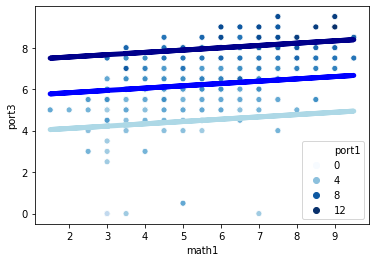

In [21]:
sns.scatterplot(x='math1', 
                y='port3', 
                hue='port1', 
                palette='Blues', 
                data=student)
b0 = model2.params[0]
b1 = model2.params[1]
b2 = model2.params[2]
plt.plot(student.math1, 
         b0+b1*student.math1+b2*4, 
         color='lightblue', 
         linewidth=5)
plt.plot(student.math1, 
         b0+b1*student.math1+b2*6, 
         color='blue', 
         linewidth=5)
plt.plot(student.math1, 
         b0+b1*student.math1+b2*8, 
         color='darkblue', 
         linewidth=5)

plt.show()

In [25]:
# Run regression with only math1
simple = sm.OLS.from_formula('port3 ~ math1', student).fit()

# Run regression with math1 and port1
multiple = sm.OLS.from_formula('port3 ~ math1 + port1', student).fit()

# Print the results of simple
print(simple.params)
# Print the results of multiple
print(multiple.params)

Intercept    3.627031
math1        0.484442
dtype: float64
Intercept    0.440159
math1        0.111161
port1        0.860927
dtype: float64


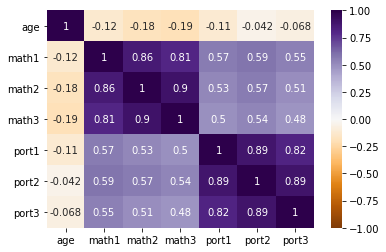

In [27]:
# Save correlation matrix
corrs = student.corr()

# Plot heatmap
sns.heatmap(corrs, 
            xticklabels=corrs.columns, 
            yticklabels=corrs.columns, 
            vmin=-1, 
            center=0, 
            vmax=1, 
            cmap='PuOr', 
            annot=True)

plt.show()

Data Citation: 

P. Cortez and A. Silva. Using Data Mining to Predict Secondary School Student Performance. In A. Brito and J. Teixeira Eds., Proceedings of 5th FUture BUsiness TEChnology Conference (FUBUTEC 2008) pp. 5-12, Porto, Portugal, April, 2008, EUROSIS, ISBN 978-9077381-39-7.

This data was downloaded from the UCI Machine learning repository: 
Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

Data link:
https://archive.ics.uci.edu/ml/datasets/Student+Performance 